#Análise estatística dos dados

In [5]:
import os.path
import numpy as np

baseDir = os.path.join('Data')
inputPath = os.path.join('PGC', 'file')
fileName = os.path.join(baseDir, inputPath)

if os.path.isfile(fileName):
    rawData = (sc
               .textFile(fileName, 4)
               .map(lambda x: x.replace('\t', ',')))  # work with either ',' or '\t' separated data

In [84]:
header = rawData.take(1)[0]
dataRDD = rawData.filter(lambda x: x!=header)

dataRDD2 = (dataRDD
           .map(lambda x: x.split(','))
           .map(lambda x: ((x[0],int(x[2])),(float(x[5]), float(x[6]), float(x[7]), float(x[8]), float(x[9]))))
           .reduceByKey(lambda (x1, x2, x3, x4, x5), (y1, y2, y3, y4, y5): (x1+y1,x2+y2, x3+y3, x4+y4, x5+y5))
           .map(lambda (x,y): (x[0],(x[1], y)))
           .groupByKey().map(lambda (x,y): (x, list(y)))
           .map(lambda (x,y): (x, sorted(y, key=lambda (a,b): a)))
           )

dataRDDcount = (dataRDD
                .map(lambda x: x.split(','))
                .map(lambda x: ((x[0],int(x[2])), 1.0))
                .reduceByKey(lambda x,y: x+y)    
                .map(lambda (x,y): (x[0],(x[1], y)))
                .groupByKey().map(lambda (x,y): (x, list(y)))
                .map(lambda (x,y): (x, sorted(y, key=lambda (a,b): a)))
                .map(lambda (x,y): (x, y[0][1]))
               )

#contagem de quantos elementos foram utilizados para o teste
dictCount = dict(dataRDDcount.collect())


meanDataRDD = dataRDD2.map(lambda (x,y): (x, [(z[0], [i/dictCount[x] for i in z[1]]) for z in y]))

print meanDataRDD.collect()





[(u'sha256cbc', [(1, [2.839821222222222, 38111074.83114812, 32.39195577777778, 3.8920524444444435, 0.45882311111111107]), (2, [5.002856111111111, 16935049.998653445, 64.20605544444444, 3.6778617777777782, 0.446893]), (3, [6.79596288888889, 4236847.402183556, 95.9137288888889, 3.4649657777777776, 0.2826285555555555]), (4, [7.998282444444445, 247.74718577777782, 127.36331488888888, 3.142358888888889, 0.0004526666666666667]), (5, [7.9983057777777775, 249.4662881111111, 127.54370066666667, 3.138026, 4.8555555555555734e-05]), (6, [7.998252666666667, 245.4478177777778, 127.62218377777779, 3.1420788888888884, -0.00010122222222222226]), (7, [7.998209222222221, 249.33368455555558, 127.41919855555557, 3.141203222222222, -0.0002536666666666667]), (8, [7.998173222222222, 245.734186, 127.46180500000001, 3.1415316666666664, -0.0024872222222222223]), (9, [7.9980996666666675, 267.2756331111111, 127.4885321111111, 3.140972555555555, 0.0008854444444444445]), (10, [7.998159444444443, 259.94658944444444, 

In [85]:
#conseguir média dos elementos RDD
#meanDataRDD = (dataRDD
#               .map(lambda (x, y): (x, map(lambda (a, b): (a, [float(c) for c in list(b)]), y)))
#               .map(lambda (x, y): (x, map(lambda (a,b): (a, reduce(lambda c,d:c+d,b)/len(b) ),y)))               
#               )

#conseguir o nome dos algoritmos
#algNames = meanDataRDD.map(lambda (x,y): x).collect()
algNames =  dictCount.keys()
print algNames

[u'md5cbc', u'sha256', u'tea', u'sha256cbc', u'md5ecb', u'xtea', u'sha256ecb', u'md4ecb', u'md4cbc', u'md4', u'md5']


In [97]:
# Collect the info of each type of analysis term in different 
# variables.
# The order is:
#0 - Entropy,
#1 - Chi-square,
#2 - Mean,
#3 - Monte-Carlo-Pi,
#4 - Serial-Correlation
entropyData = meanDataRDD.map(lambda (x,y): (x, [(c[0], c[1][0]) for c in y])).collect()
chiSquareData = meanDataRDD.map(lambda (x,y): (x, [(c[0], c[1][1]) for c in y])).collect()
MeanData = meanDataRDD.map(lambda (x,y): (x, [(c[0], c[1][2]) for c in y])).collect()
MonteCarloPiData = meanDataRDD.map(lambda (x,y): (x, [(c[0], c[1][3]) for c in y])).collect()
SerialCorrelationData = meanDataRDD.map(lambda (x,y): (x, [(c[0], c[1][4]) for c in y])).collect()

dataType = ['Entropy', 'Chi-square', 'Mean', 'Mont-Carlo-Pi', 'Serial-Correlation']
Color = ['r','b','g','y','c','k','purple']


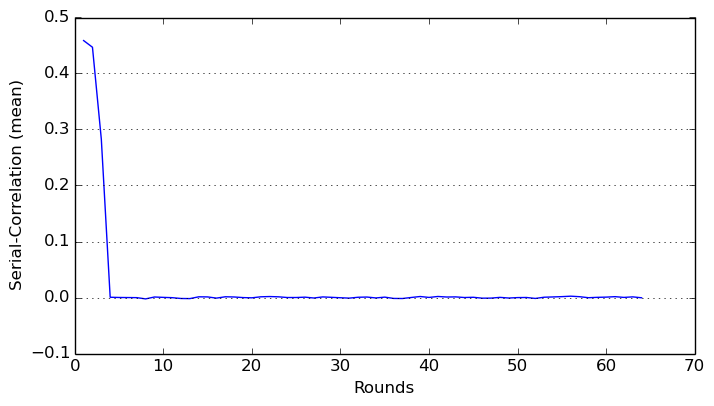

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')

X,Y = zip(*meanDataRDD1[0][1])
plt.plot(X,Y)


plt.grid(b=True, which='major', axis='y')
plt.ylabel( '{} {}'.format(dataType[4], '(mean)'))
plt.xlabel('Rounds')
pass

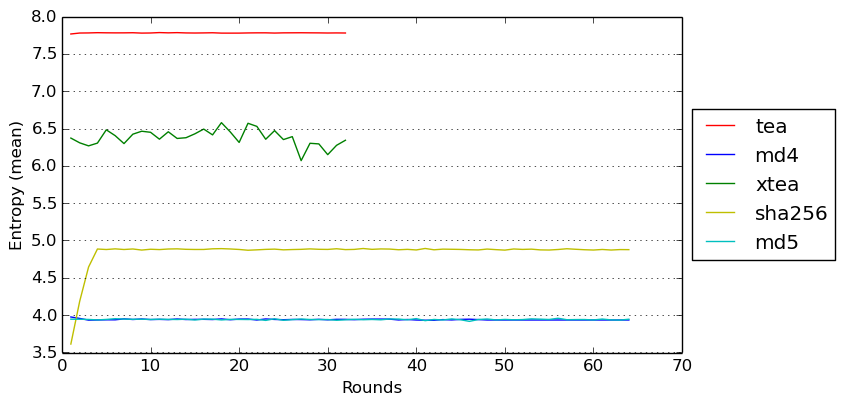

In [5]:
import matplotlib.pyplot as plt

Color = ['r','b','g','y','c','k','purple']

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')

X,Y = zip(*meanDataRDD.collect()[0][1])
plt.plot(X,Y, color=Color[0])

X,Y = zip(*meanDataRDD.collect()[1][1])
plt.plot(X,Y, color=Color[1])

X,Y = zip(*meanDataRDD.collect()[2][1])
plt.plot(X,Y, color=Color[2])

X,Y = zip(*meanDataRDD.collect()[3][1])
plt.plot(X,Y, color=Color[3])

X,Y = zip(*meanDataRDD.collect()[4][1])
plt.plot(X,Y, color=Color[4])

#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend(algNames, loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

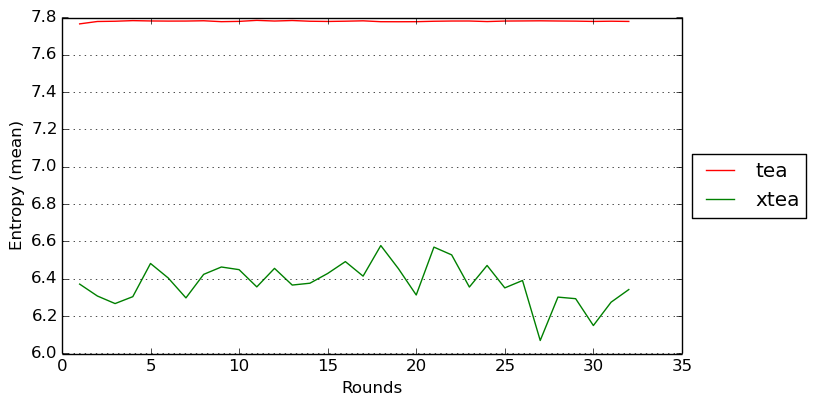

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[0][1])
plt.plot(X,Y, color=Color[0])

X,Y = zip(*meanDataRDD.collect()[2][1])
plt.plot(X,Y, color
         =Color[2])

#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[0], algNames[2]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

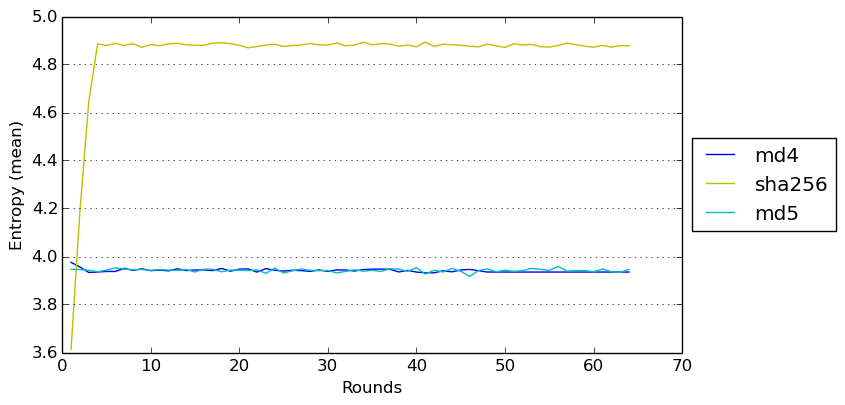

In [7]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[1][1])
plt.plot(X,Y, color=Color[1])

X,Y = zip(*meanDataRDD.collect()[3][1])
plt.plot(X,Y, color=Color[3])

X,Y = zip(*meanDataRDD.collect()[4][1])
plt.plot(X,Y, color=Color[4])

#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[1], algNames[3], algNames[4]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

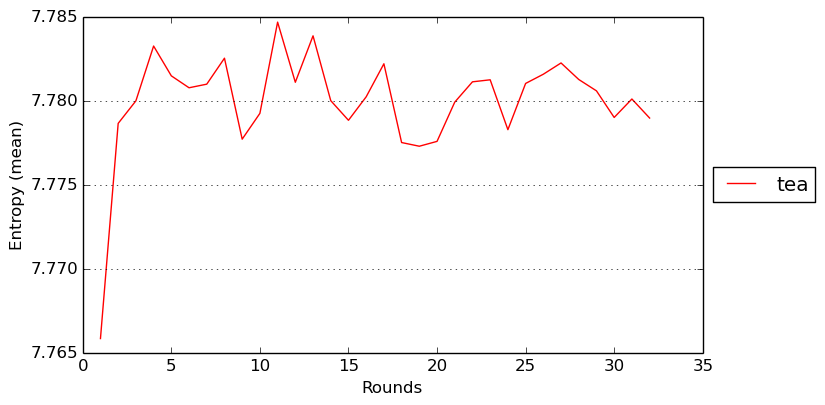

In [8]:
import matplotlib.pyplot as plt

alg=0

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[alg][1])
plt.plot(X,Y, color=Color[alg])



#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[alg]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

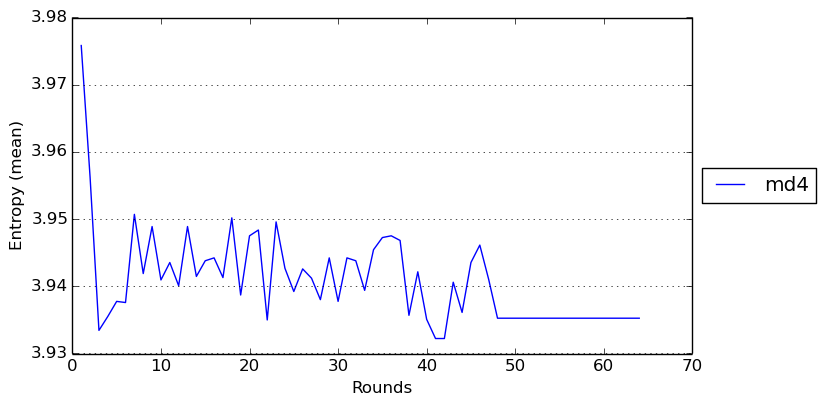

In [9]:
import matplotlib.pyplot as plt

alg=1

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[alg][1])
plt.plot(X,Y, color=Color[alg])



#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[alg]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

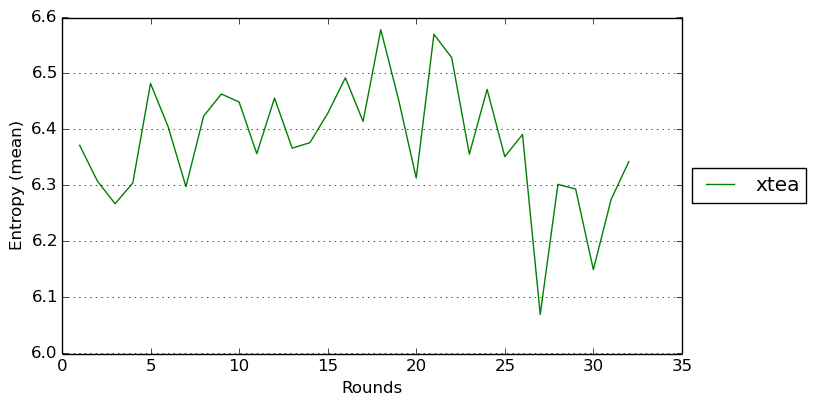

In [10]:
import matplotlib.pyplot as plt

alg=2

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[alg][1])
plt.plot(X,Y, color=Color[alg])



#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[alg]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

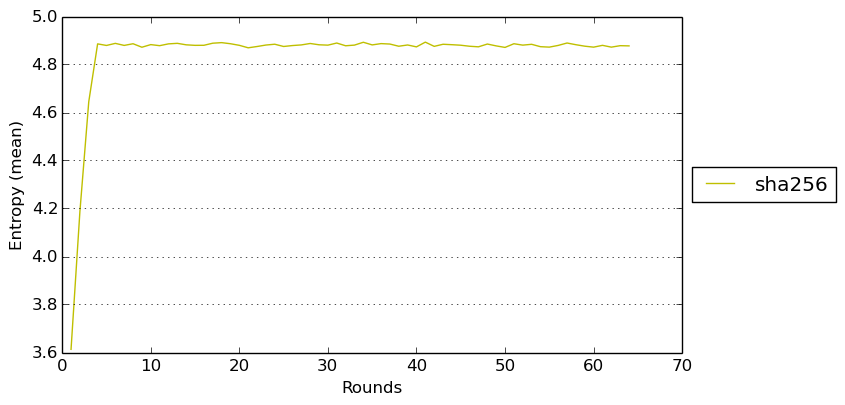

In [11]:
import matplotlib.pyplot as plt

alg=3

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[alg][1])
plt.plot(X,Y, color=Color[alg])



#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[alg]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

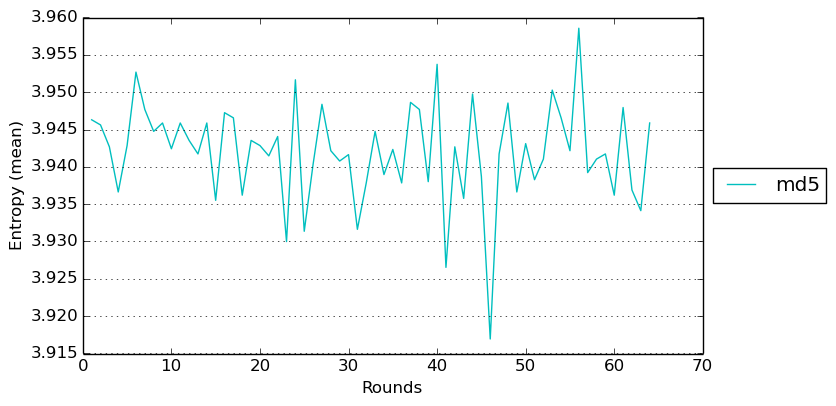

In [12]:
import matplotlib.pyplot as plt

alg=4

fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')


X,Y = zip(*meanDataRDD.collect()[alg][1])
plt.plot(X,Y, color=Color[alg])



#plots = [plt.bar(indices,Y[algNames[i]], width, color=Color[i], bottom=Bottom[i]) for i in range(len(Day))]
#plt.legend( [p[0] for p in plots], Day,loc='center left', bbox_to_anchor=(1, 0.5) ) 
plt.legend([algNames[alg]], loc = 'center left', bbox_to_anchor=(1, 0.5))


plt.grid(b=True, which='major', axis='y')
plt.ylabel('Entropy (mean)')
plt.xlabel('Rounds')
pass

In [63]:
a = (1,2,3,4)

b = (c/2.0 for c in a )

print list(b)

[0.5, 1.0, 1.5, 2.0]
